In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data_predict=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [ ]:
print('Data First 5 Rows\n')
data_predict.head()

Data First 5 Rows



Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [ ]:
print('Data Last 5 Rows\n')
data_predict.tail()

Data Last 5 Rows



Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84

In [ ]:
#random rows in dataset
print('Data Random Rows\n')
data_predict.sample(5)

Data Random Rows



Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
317         318        300           99                  1  1.0   2.5  8.01   
400         401        304          100                  2  3.5   3.0  8.22   
224         225        305          105                  2  3.0   2.0  8.23   
432         433        324          112                  4  4.5   4.0  9.22   
431         432        320          112                  2  3.5   3.5  8.78   

     Research  Chance of Admit   
317         0              0.58  
400         0              0.63  
224         0              0.67  
432         1              0.86  
431         1              0.73

In [ ]:
print("Random rows in dataset\n")
data_predict.sample(frac=.1)

Random rows in dataset



Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
105         106        316          110                  3  4.0   4.5  8.78   
71           72        336          112                  5  5.0   5.0  9.76   
258         259        326          102                  4  5.0   5.0  8.76   
278         279        308          103                  2  3.0   3.5  8.49   
473         474        316          102                  2  4.0   3.5  8.15   
38           39        304          105                  1  3.0   1.5  7.50   
88           89        314          108                  3  4.5   3.5  8.14   
390         391        314          102                  2  2.0   2.5  8.24   
114         115        311          105                  3  3.5   3.0  8.45   
445         446        328          116                  5  4.5   5.0  9.08   
4             5        314          103                  2  2.0   3.0  8.21   
352         353        303          100                  2  3.0   3.5  8.06   
228         229        318          112                  3  4.0   3.5  8.67   
133         134        323          112                  5  4.0   4.5  8.78   
52           53        334          116                  4  4.0   3.0  8.00   
387         388        307          105                  2  2.0   3.5  8.10   
66           67        327          114                  3  3.0   3.0  9.02   
262         263        308          103                  2  2.5   4.0  8.36   
413         414        317          101                  3  3.0   2.0  7.94   
217         218        321          109                  4  4.0   4.0  9.13   
184         185        316          106                  2  2.5   4.0  8.32   
10           11        325          106                  3  3.5   4.0  8.40   
69           70        328          115                  4  4.5   4.0  9.16   
210         211        325          108                  4  4.5   4.0  9.06   
307         308        325          112                  4  4.0   4.0  9.00   
231         232        319          106                  3  3.5   2.5  8.33   
89           90        316          109                  4  4.5   3.5  8.76   
355         356        317          106                  2  2.0   3.5  8.12   
169         170        311           99                  2  2.5   3.0  7.98   
101         102        312          105                  2  2.5   3.0  8.12   
48           49        321          110                  3  3.5   5.0  8.85   
417         418        316          103                  3  3.5   2.0  7.68   
301         302        319          108                  2  2.5   3.0  8.76   
178         179        309          108                  3  2.5   3.0  8.12   
303         304        323          107                  3  3.5   3.5  8.55   
189         190        324          112                  5  5.0   5.0  9.08   
259         260        331          119                  4  5.0   4.5  9.34   
40           41        308          110                  3  3.5   3.0  8.00   
219         220        312          104                  3  3.5   3.5  8.42   
489         490        302          110                  3  4.0   4.5  8.50   
204         205        298          105                  3  3.5   4.0  8.54   
411         412        313           94                  2  2.5   1.5  8.13   
274         275        315          100                  1  2.0   2.5  7.95   
112         113        301          107                  3  3.5   3.5  8.34   
268         269        327          113                  4  4.5   5.0  9.14   
236         237        325          112                  4  4.0   4.5  9.17   
467         468        318          101                  5  3.5   5.0  8.78   
488         489        322          112                  3  3.0   4.0  8.62   
386         387        302          101                  2  2.5   3.5  7.96   
65           66        325          112                

In [ ]:
print('Data Show Describe\n')
data_predict.describe()

Data Show Describe



Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

In [ ]:
print('Data Show Info\n')
data_predict.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
print('Data Show Columns')
data_predict.columns

Data Show Columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data_predict=data_predict.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [ ]:
data_predict.dtypes

SerialNo              int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

In [ ]:
print('Data Show Shape')
data_predict.shape

Data Show Shape


(500, 9)

In [ ]:
data_predict.isnull().values.any()

False

In [ ]:
print('Data Show Is NULL')
data_predict.isnull().sum()

Data Show Is NULL


SerialNo            0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

In [ ]:
for col in data_predict.columns:
    print(data_predict[data_predict[col].isnull()])

Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfA

In [ ]:
print('The result is that the value of SeriaNo feature does not have any significance.')
print('Because it is an increasing value and personalized does not matter any.')

len(data_predict['SerialNo'].unique())

The result is that the value of SeriaNo feature does not have any significance.
Because it is an increasing value and personalized does not matter any.


500

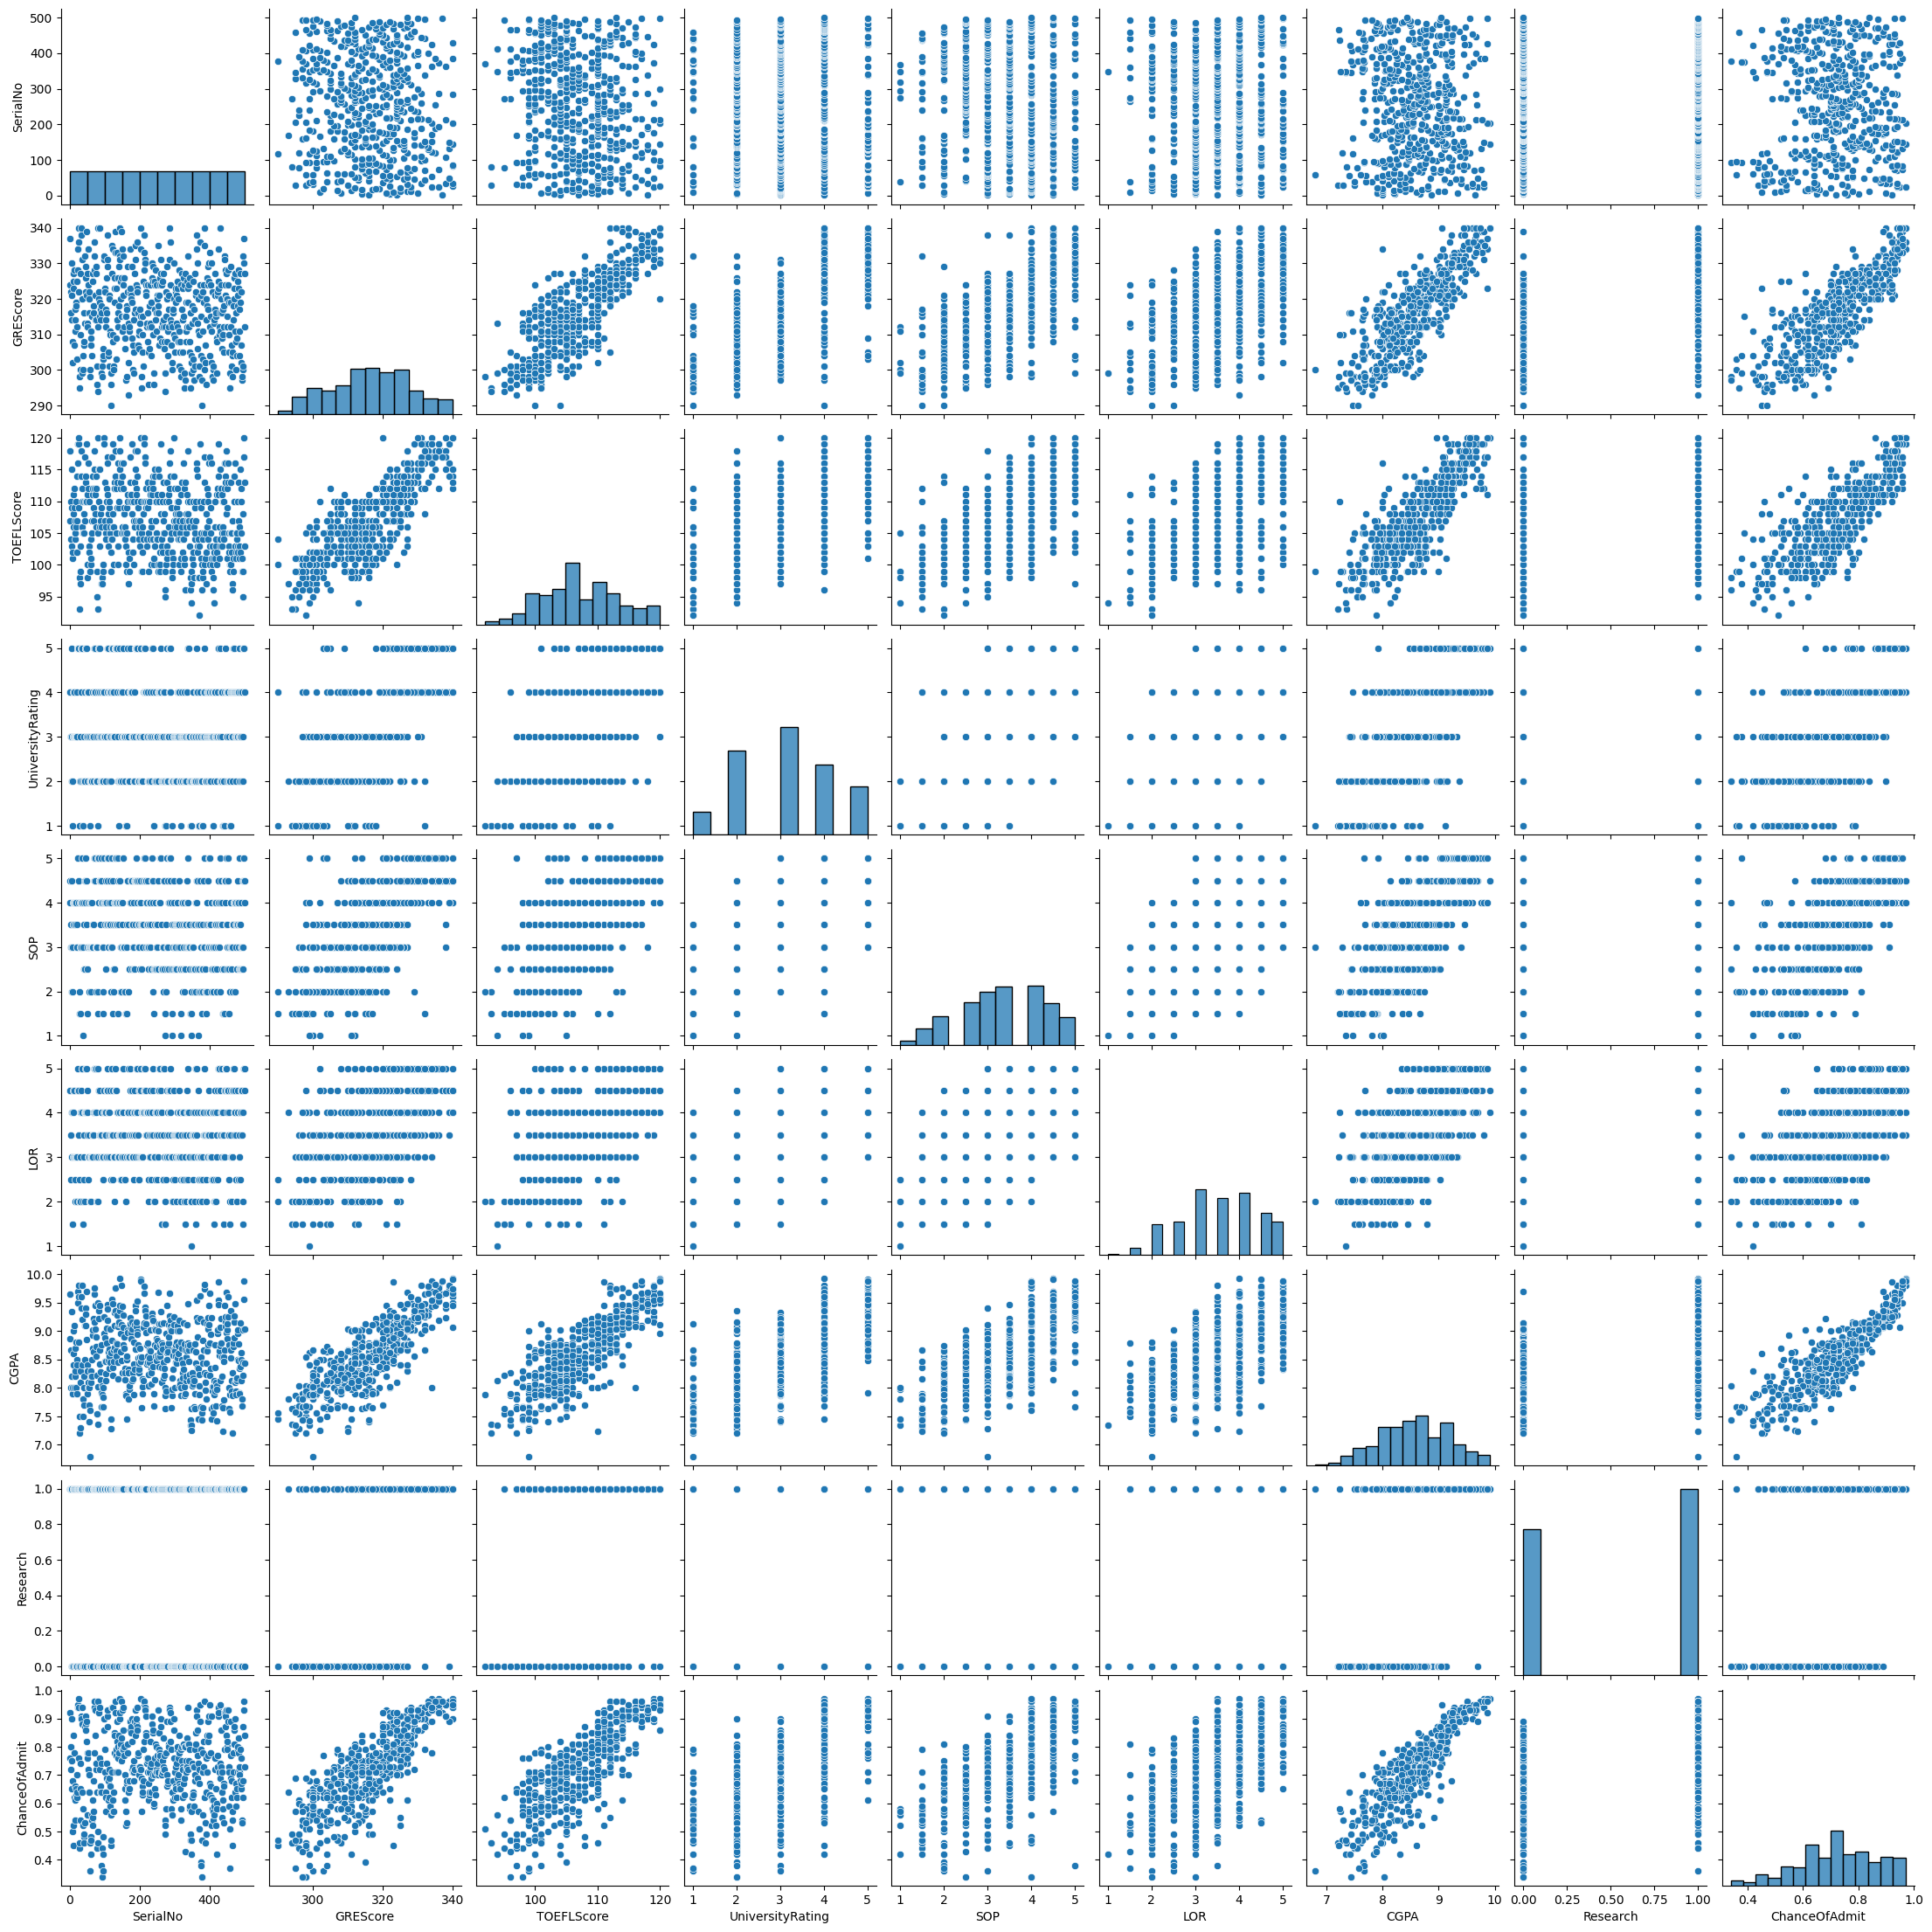

In [ ]:
sns.pairplot(data_predict)
plt.show()

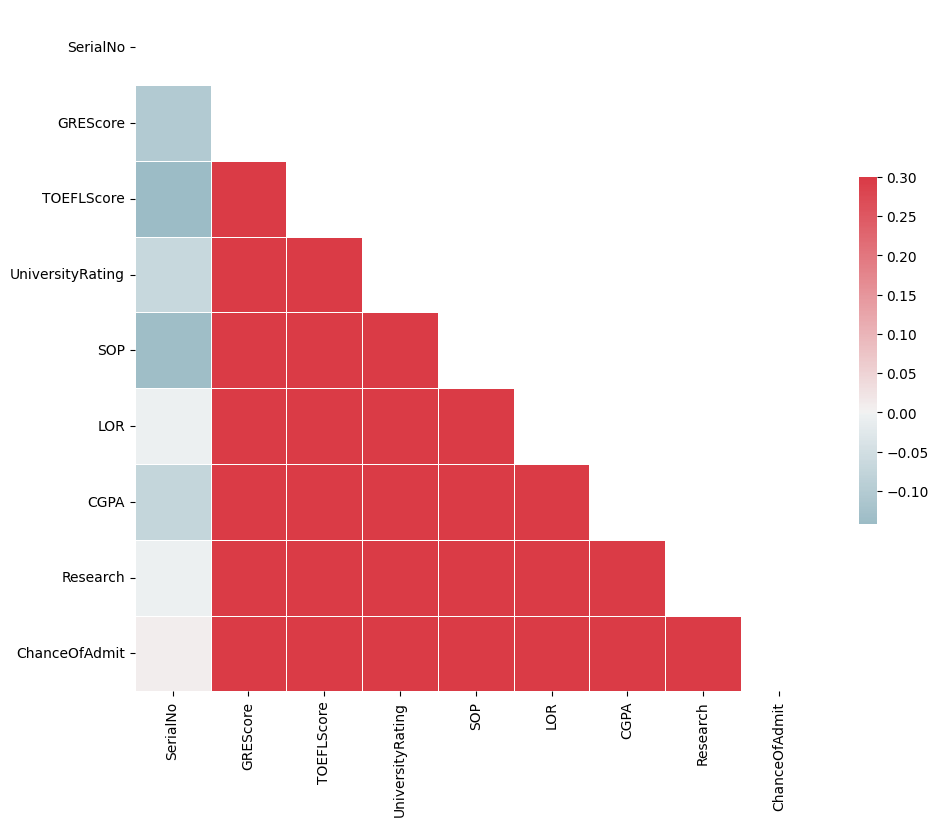

In [ ]:
corr = data_predict.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


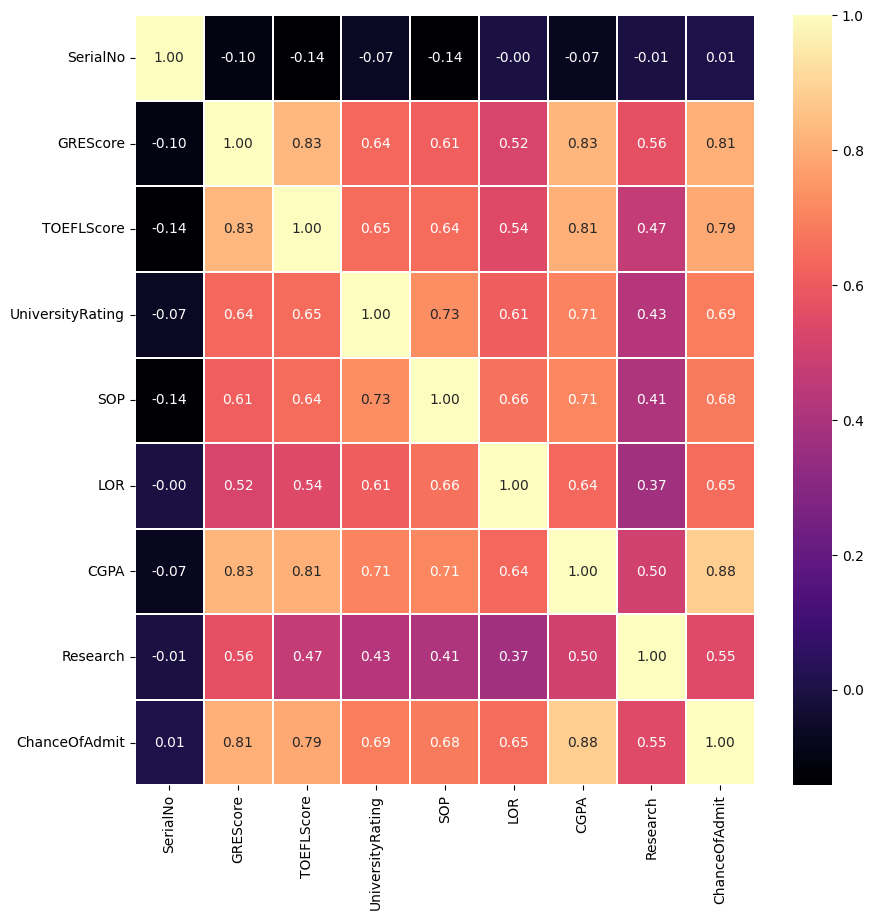

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_predict.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


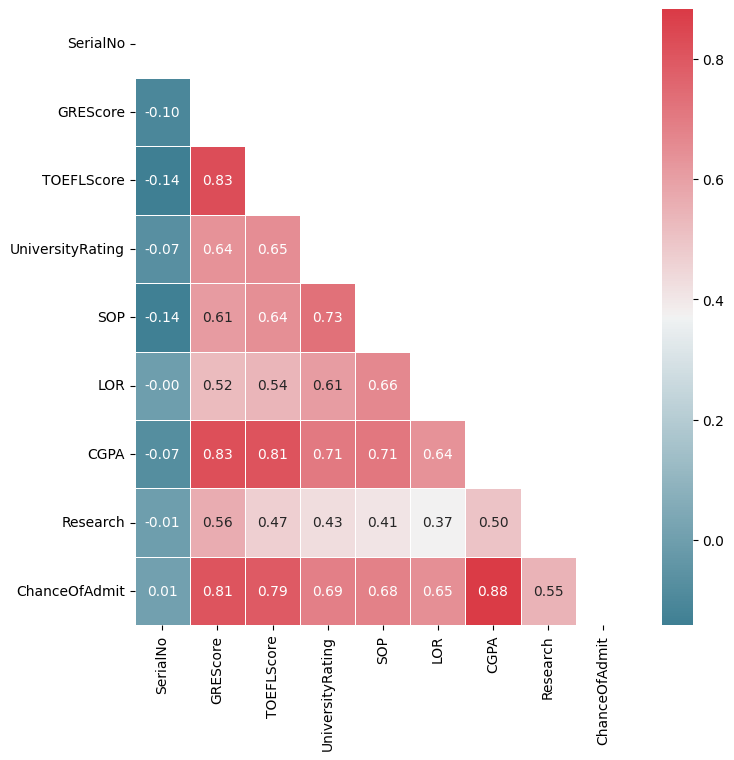

In [ ]:
import numpy as np
corr = data_predict.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
data_predict=data_predict.drop(['SerialNo'],axis=1) #1 column 0 row

In [ ]:
data_predict.corr()

GREScore  TOEFLScore  UniversityRating       SOP       LOR  \
GREScore          1.000000    0.827200          0.635376  0.613498  0.524679   
TOEFLScore        0.827200    1.000000          0.649799  0.644410  0.541563   
UniversityRating  0.635376    0.649799          1.000000  0.728024  0.608651   
SOP               0.613498    0.644410          0.728024  1.000000  0.663707   
LOR               0.524679    0.541563          0.608651  0.663707  1.000000   
CGPA              0.825878    0.810574          0.705254  0.712154  0.637469   
Research          0.563398    0.467012          0.427047  0.408116  0.372526   
ChanceOfAdmit     0.810351    0.792228          0.690132  0.684137  0.645365   

                      CGPA  Research  ChanceOfAdmit  
GREScore          0.825878  0.563398       0.810351  
TOEFLScore        0.810574  0.467012       0.792228  
UniversityRating  0.705254  0.427047       0.690132  
SOP               0.712154  0.408116       0.684137  
LOR               0.637469  0.372526       0.645365  
CGPA              1.000000  0.501311       0.882413  
Research          0.501311  1.000000       0.545871  
ChanceOfAdmit     0.882413  0.545871       1.000000

In [ ]:
data_predict.iloc[:,:6].corr()

GREScore  TOEFLScore  UniversityRating       SOP       LOR  \
GREScore          1.000000    0.827200          0.635376  0.613498  0.524679   
TOEFLScore        0.827200    1.000000          0.649799  0.644410  0.541563   
UniversityRating  0.635376    0.649799          1.000000  0.728024  0.608651   
SOP               0.613498    0.644410          0.728024  1.000000  0.663707   
LOR               0.524679    0.541563          0.608651  0.663707  1.000000   
CGPA              0.825878    0.810574          0.705254  0.712154  0.637469   

                      CGPA  
GREScore          0.825878  
TOEFLScore        0.810574  
UniversityRating  0.705254  
SOP               0.712154  
LOR               0.637469  
CGPA              1.000000

In [ ]:
#show data columns
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

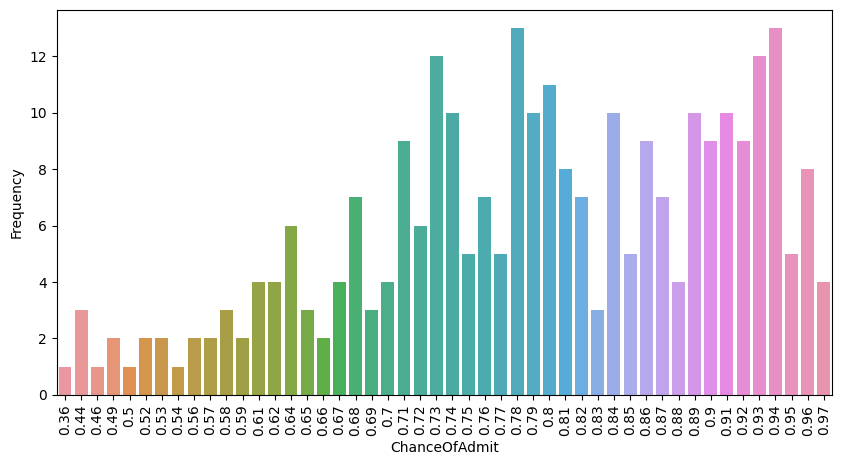

In [ ]:
#Research group 1, ChanceOfAdmit value of all TOEFLScore data by grouping the number of data is performed.
plt.figure(figsize=(10,5))
research_predict=data_predict[data_predict['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

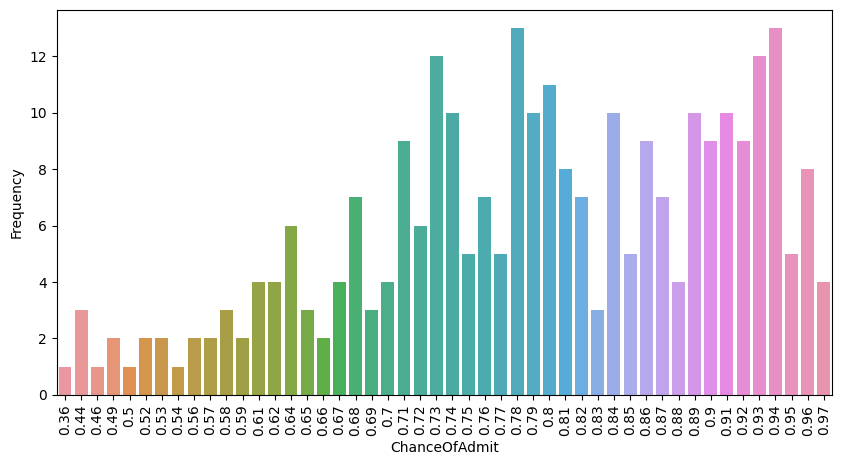

In [ ]:
#Research group 1, ChanceOfAdmit value of all TOEFLScore data by grouping the number of data is performed.
plt.figure(figsize=(10,5))
research_predict=data_predict[data_predict['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
research_predict=research_predict.sort_values(ascending=True)
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_predict.head(1)

GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0       337         118                 4  4.5  4.5  9.65         1   

   ChanceOfAdmit  
0           0.92

In [ ]:
max(data_predict['UniversityRating'])

5

In [ ]:
filter_data=data_predict[np.logical_and(data_predict['ChanceOfAdmit']==1.0,data_predict['UniversityRating']==max(data_predict['UniversityRating']))]

In [ ]:
filter_data.groupby('UniversityRating')[['GREScore','TOEFLScore','CGPA']].mean()

Empty DataFrame
Columns: [GREScore, TOEFLScore, CGPA]
Index: []

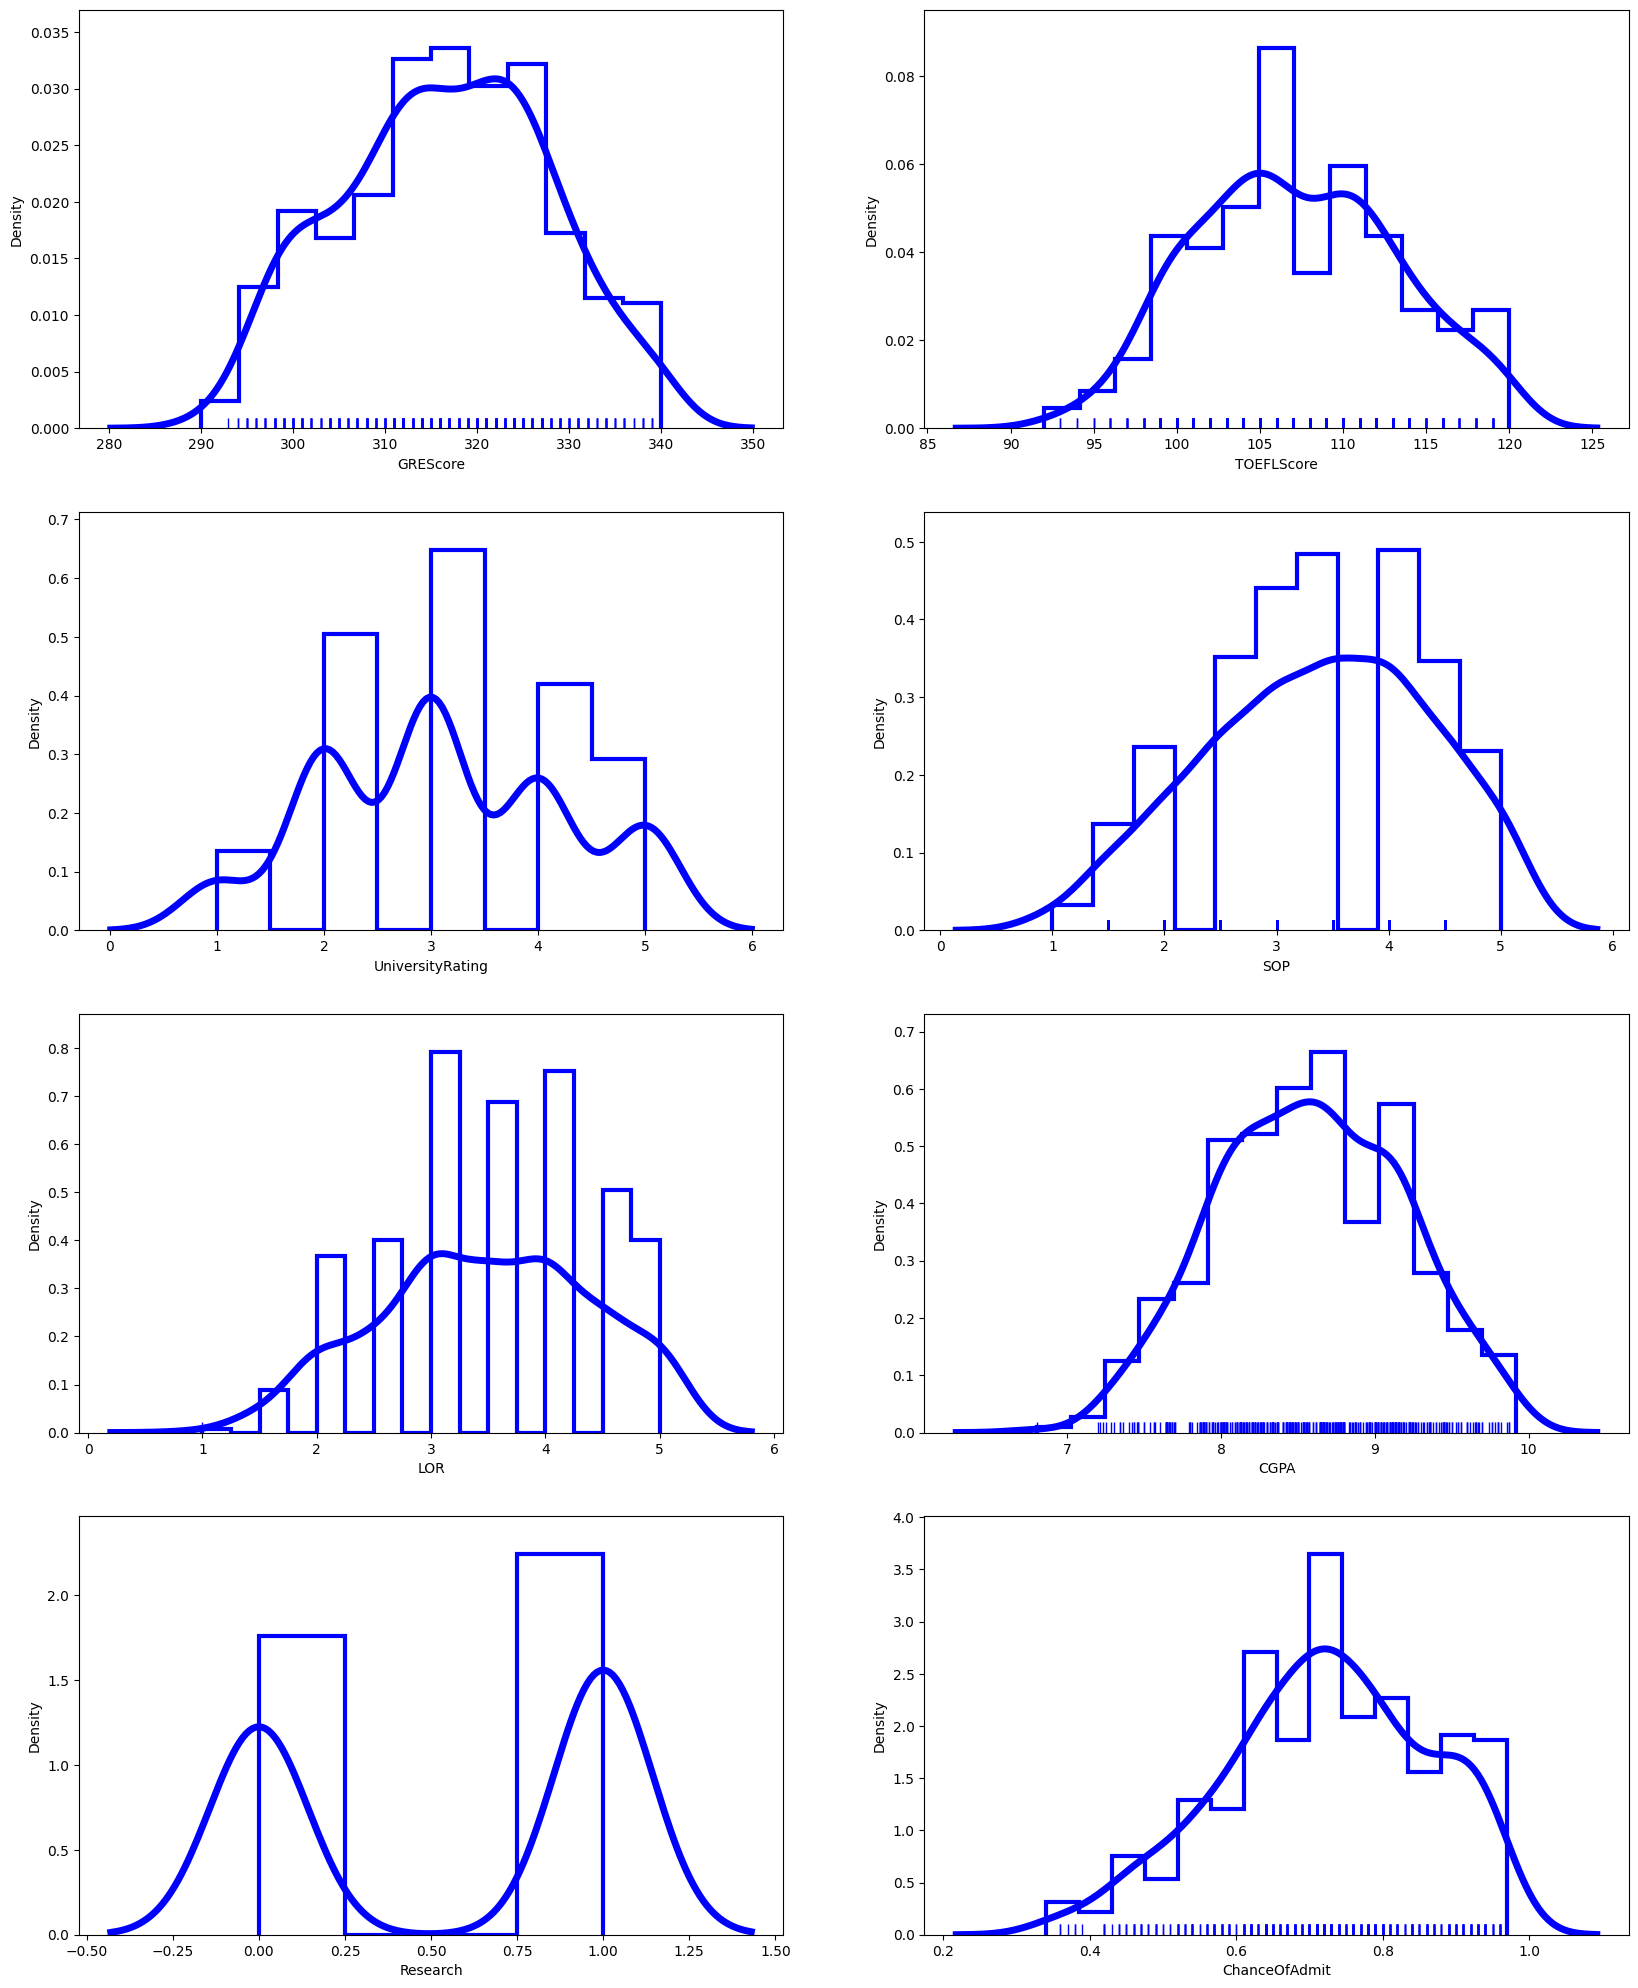

In [ ]:
plt.figure(figsize=(20,25))
i = 0

for item in data_predict.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.distplot(data_predict[item], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "blue", "lw": 5, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(item))
#     sns.distplot(admission_v1[item], kde=True,label="{0}".format(item))
plt.show()

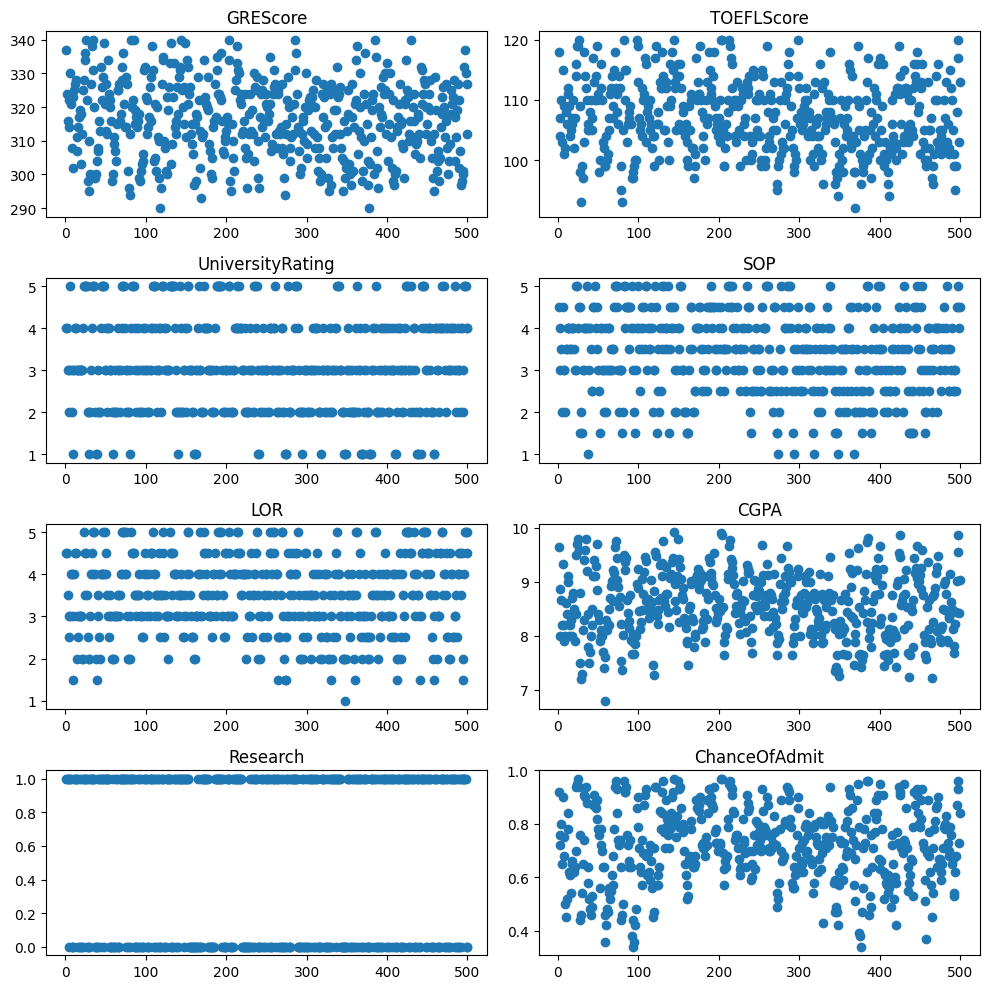

In [ ]:
for i,col in enumerate(data_predict.columns):
    plt.subplot(4,2,i+1)
    plt.scatter(np.arange(1,501),data_predict[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()


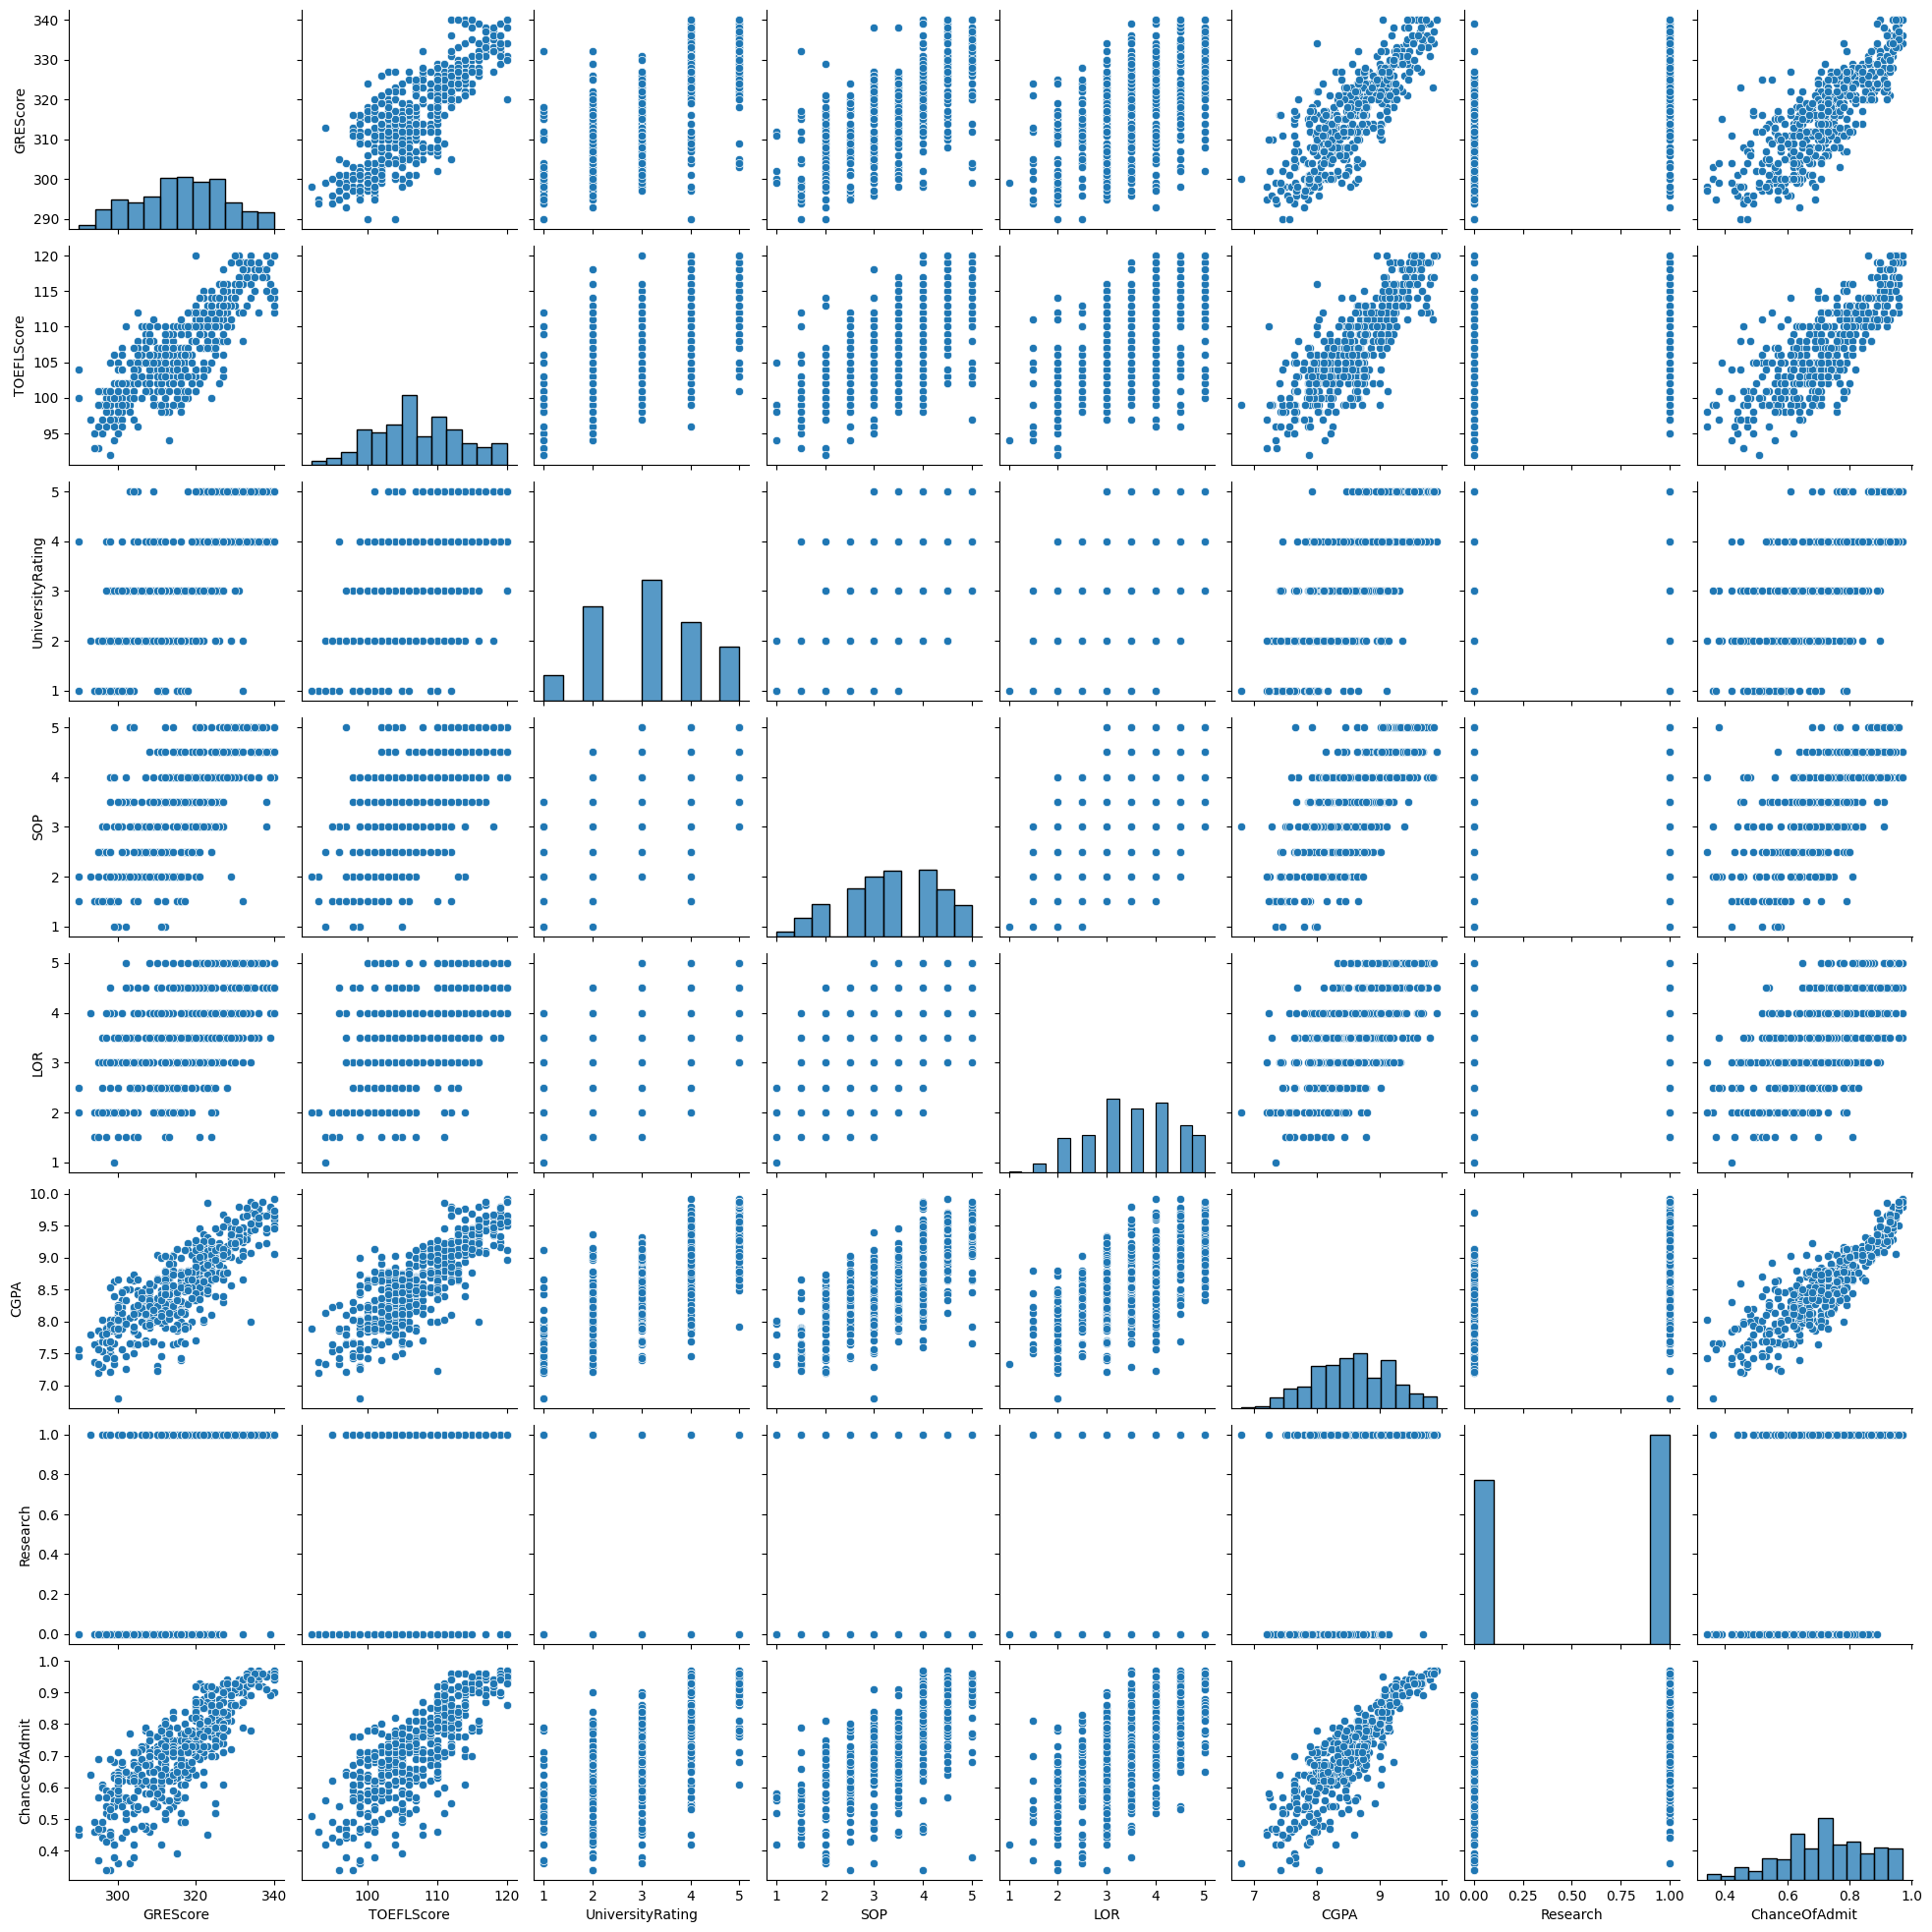

In [ ]:
 #Basic correlogram
sns.pairplot(data_predict)
plt.show()

In [ ]:
sns.violinplot(data_predict, palette="Set3", bw=.2, cut=1, linewidth=1)

ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
plt.xlabel("Values")
plt.show()

In [ ]:
data_predict.head()

GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0       337         118                 4  4.5  4.5  9.65         1   
1       324         107                 4  4.0  4.5  8.87         1   
2       316         104                 3  3.0  3.5  8.00         1   
3       322         110                 3  3.5  2.5  8.67         1   
4       314         103                 2  2.0  3.0  8.21         0   

   ChanceOfAdmit  
0           0.92  
1           0.76  
2           0.72  
3           0.80  
4           0.65

In [ ]:
plt.figure(figsize=(7,7))
for i,col in enumerate(data_predict.columns):
    plt.title(col)
    plt.subplot(4,2,i+1)
    sns.swarmplot(data_predict[col])
    ax,fig=plt.gcf(),plt.gca()
    plt.tight_layout()
plt.show()

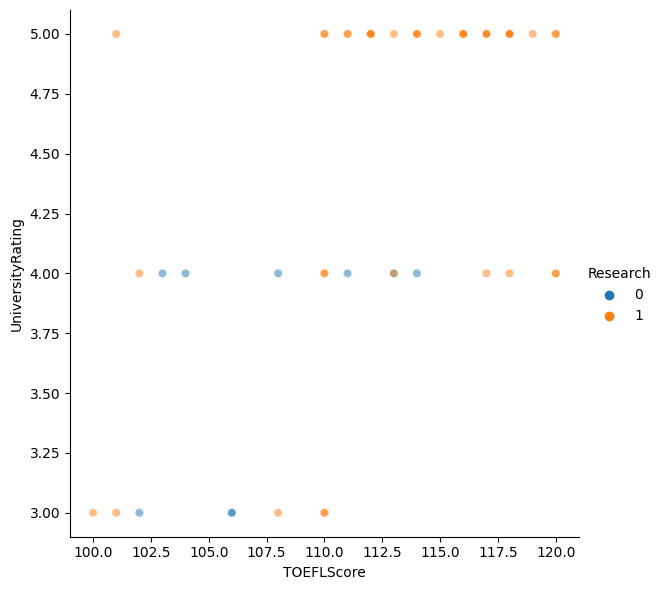

In [ ]:
data_lor=data_predict[data_predict['LOR']>4.5]
sns.relplot(x="TOEFLScore", y="UniversityRating", hue="Research",
            sizes=(40, 400), alpha=.5,
            height=6, data=data_lor)

In [ ]:
data_predict.head()

GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0       337         118                 4  4.5  4.5  9.65         1   
1       324         107                 4  4.0  4.5  8.87         1   
2       316         104                 3  3.0  3.5  8.00         1   
3       322         110                 3  3.5  2.5  8.67         1   
4       314         103                 2  2.0  3.0  8.21         0   

   ChanceOfAdmit  
0           0.92  
1           0.76  
2           0.72  
3           0.80  
4           0.65

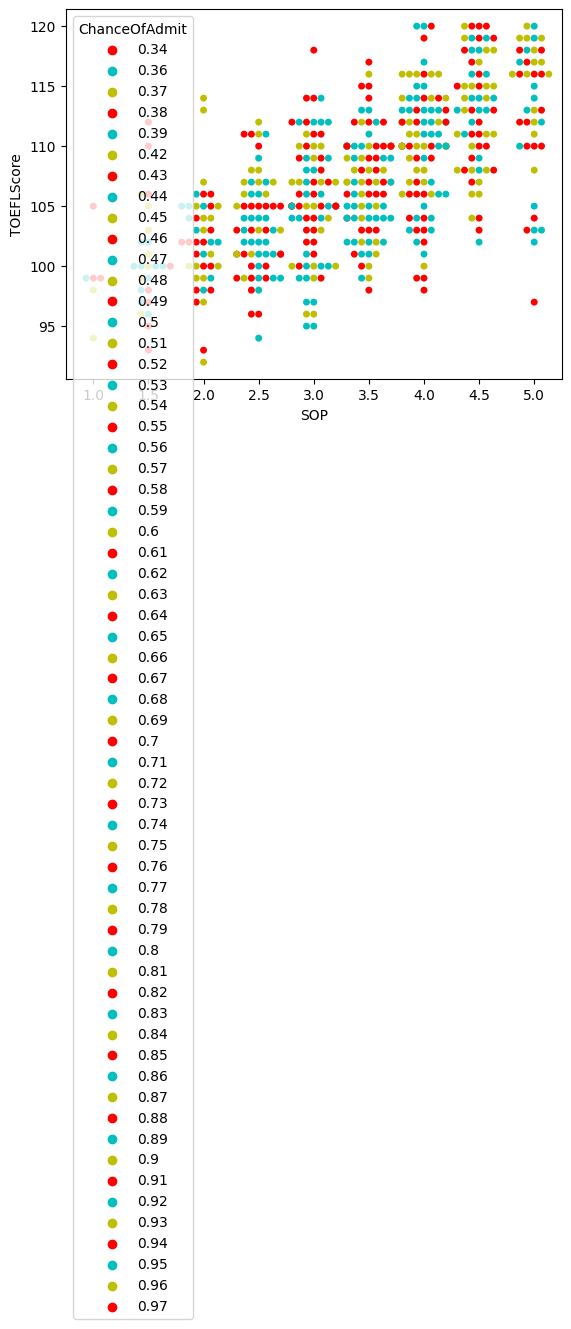

In [ ]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(y="TOEFLScore", x="SOP", hue="ChanceOfAdmit",
              palette=["r", "c", "y"], data=data_predict)
plt.show()

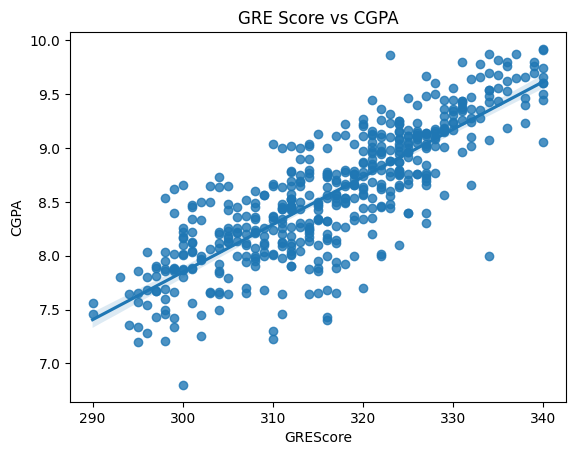

In [ ]:
fig = sns.regplot(x="GREScore", y="CGPA", data=data_predict)
plt.title("GRE Score vs CGPA")
plt.show()

In [ ]:
#data show first five rows
data_predict.head()

GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0       337         118                 4  4.5  4.5  9.65         1   
1       324         107                 4  4.0  4.5  8.87         1   
2       316         104                 3  3.0  3.5  8.00         1   
3       322         110                 3  3.5  2.5  8.67         1   
4       314         103                 2  2.0  3.0  8.21         0   

   ChanceOfAdmit  
0           0.92  
1           0.76  
2           0.72  
3           0.80  
4           0.65

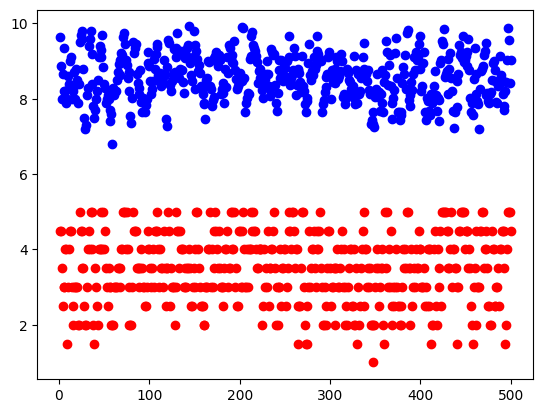

In [ ]:
#We analyze the status of the CGPA and LOR data.
plt.scatter(x=np.arange(1,501),y=data_predict['CGPA'],color='b')
plt.scatter(x=np.arange(1,501),y=data_predict['LOR'],color='r')
plt.show()


In [ ]:
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

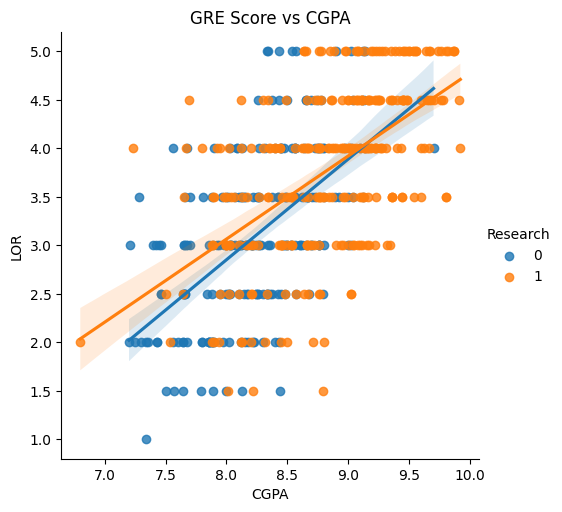

In [ ]:
#Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working
fig = sns.lmplot(x="CGPA", y="LOR", data=data_predict, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

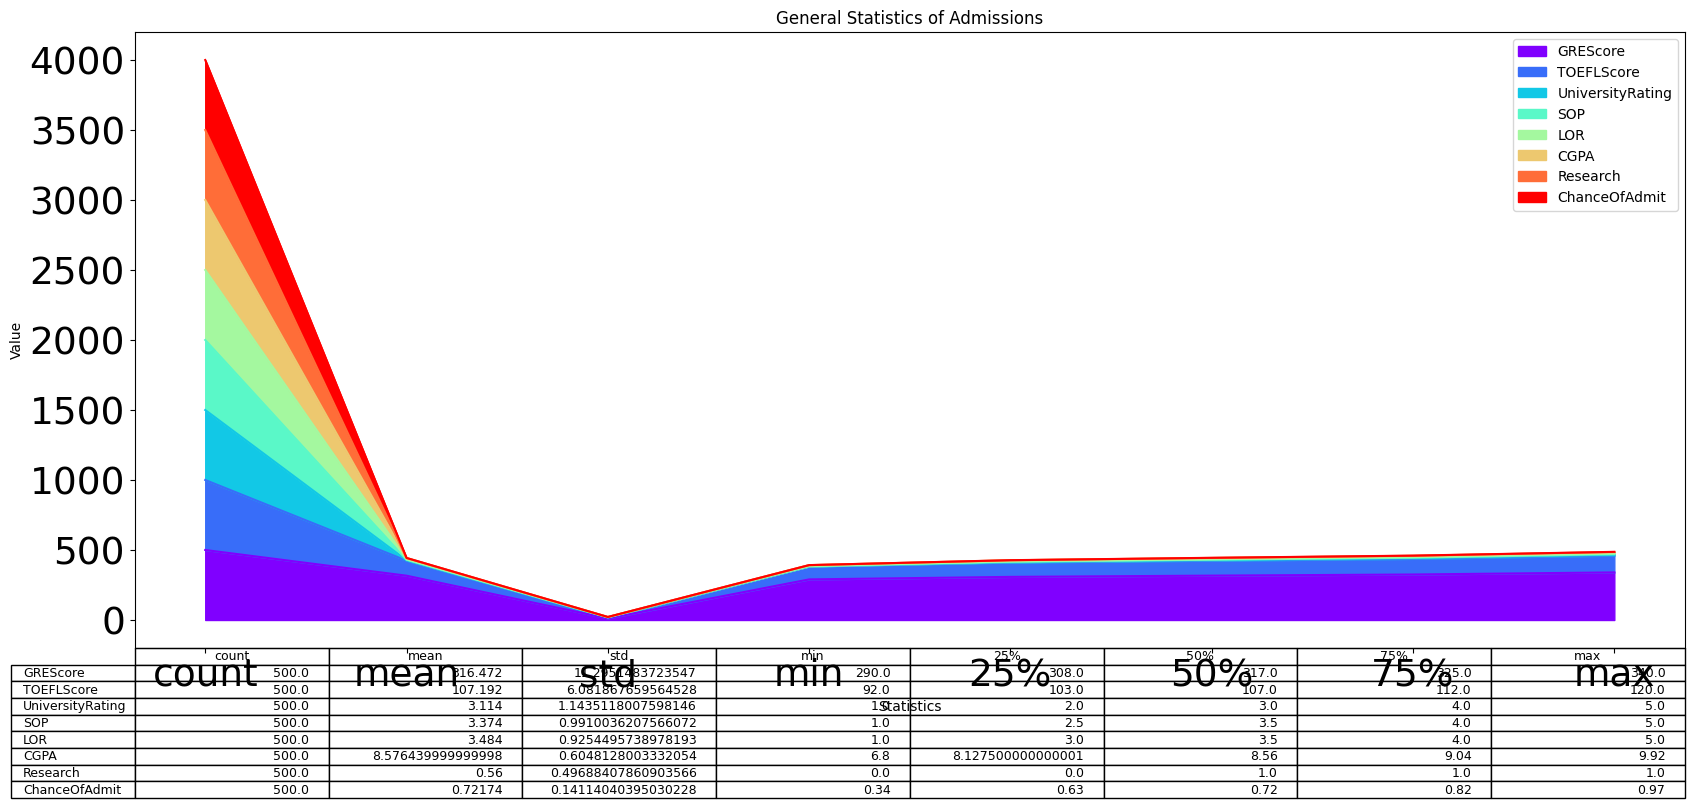

In [ ]:
data_predict.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")
plt.show()

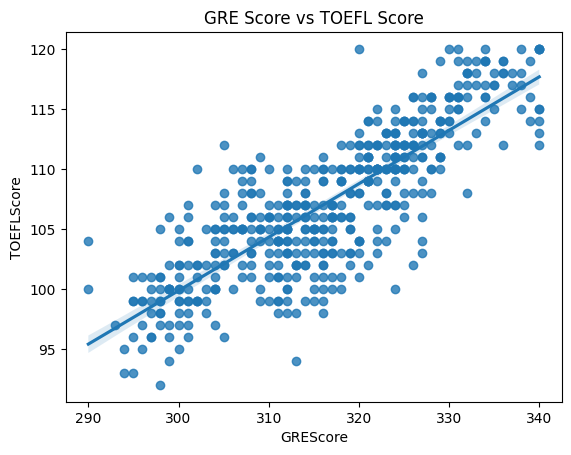

In [ ]:
fig = sns.regplot(x=data_predict["GREScore"], y=data_predict["TOEFLScore"])
plt.title("GRE Score vs TOEFL Score")
plt.show()

In [ ]:
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

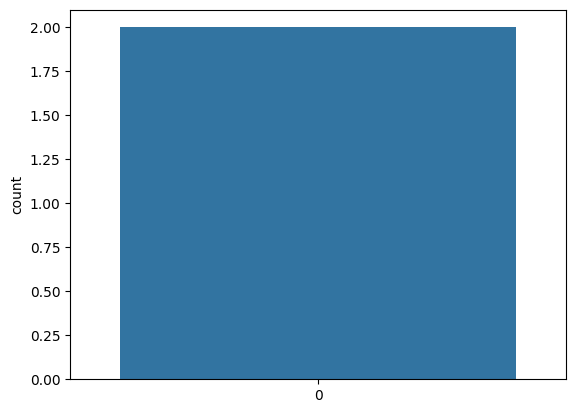

In [ ]:
sns.countplot(data_predict.Research.value_counts())
plt.show()

In [ ]:
data_predict[data_predict['ChanceOfAdmit']>0.85].groupby('Research')['UniversityRating'].median()

Research
0    4.0
1    5.0
Name: UniversityRating, dtype: float64

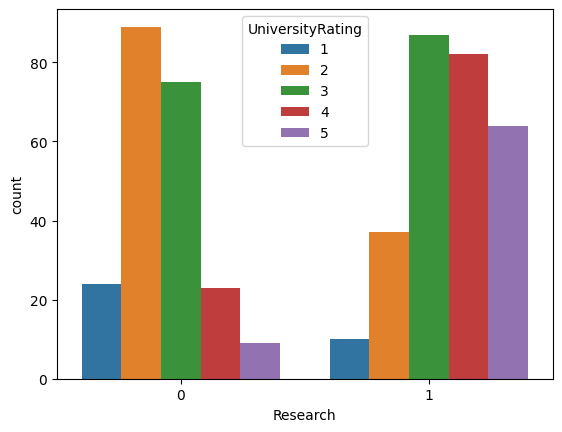

In [ ]:
sns.countplot(x='Research', hue='UniversityRating', data=data_predict)
plt.show()

In [ ]:
data_predict.head()

GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0       337         118                 4  4.5  4.5  9.65         1   
1       324         107                 4  4.0  4.5  8.87         1   
2       316         104                 3  3.0  3.5  8.00         1   
3       322         110                 3  3.5  2.5  8.67         1   
4       314         103                 2  2.0  3.0  8.21         0   

   ChanceOfAdmit  
0           0.92  
1           0.76  
2           0.72  
3           0.80  
4           0.65

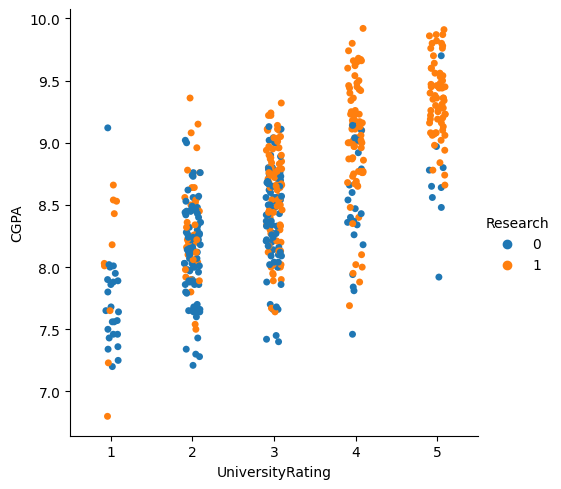

In [ ]:
sns.catplot(y="CGPA", x="UniversityRating", hue="Research", data=data_predict)
plt.show()

In [ ]:
# Plot the responses for different events and regions
sns.lineplot(y="CGPA", x="UniversityRating",
             hue="Research",data=data_predict)
plt.show()

In [ ]:
print("Max GREScore :",max(data_predict.GREScore))
print("Min GREScore :",min(data_predict.GREScore))

Max GREScore : 340
Min GREScore : 290


In [ ]:
maxvalues=data_predict[data_predict.GREScore>=320]
meanvalues=data_predict[(data_predict.GREScore>295)&(data_predict.GREScore<320)]
minvalues=data_predict[(data_predict.GREScore<=295)]


In [ ]:
print(len(maxvalues))
print(len(meanvalues))
print(len(minvalues))

213
277
10


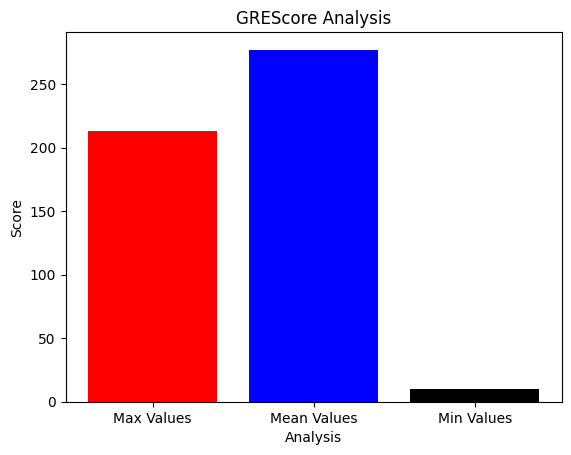

In [ ]:
y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['Max Values','Mean Values','Min Values']
colorlists=['red','blue','black']
plt.bar(x,y,color=colorlists)
plt.title('GREScore Analysis')
plt.xlabel('Analysis')
plt.ylabel('Score')
plt.show()

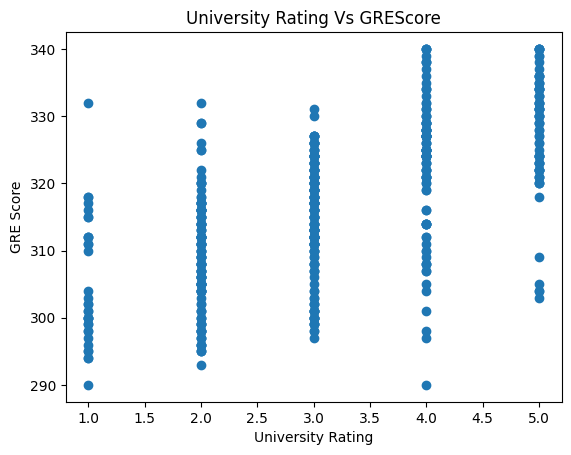

In [ ]:
plt.scatter(x='UniversityRating',y='GREScore',data=data_predict)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()


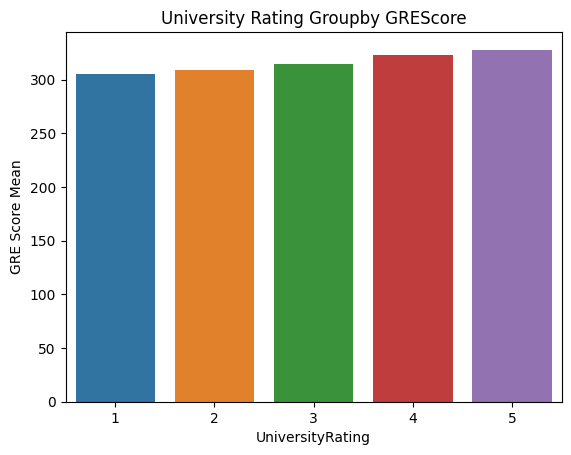

In [ ]:
data_predict.groupby('UniversityRating')['GREScore'].mean()
sns.barplot(x=data_predict.groupby('UniversityRating')['GREScore'].mean().index,y=data_predict.groupby('UniversityRating')['GREScore'].mean().values)
plt.ylabel('GRE Score Mean')
plt.title('University Rating Groupby GREScore')
plt.show()

In [ ]:
print("Min TOEFLScore :",min(data_predict.TOEFLScore))
print("Max TOEFLScore :",max(data_predict.TOEFLScore))

Min TOEFLScore : 92
Max TOEFLScore : 120


In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_predict.TOEFLScore.value_counts().index,y=data_predict.TOEFLScore.value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_predict.UniversityRating.value_counts()

3    162
2    126
4    105
5     73
1     34
Name: UniversityRating, dtype: int64

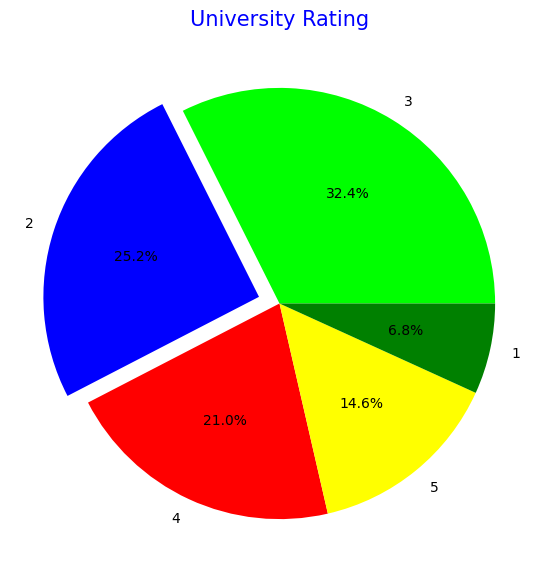

In [ ]:
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0,0]
plt.figure(figsize=(7,7))
plt.pie(data_predict.UniversityRating.value_counts().values,explode=explode,labels=data_predict.UniversityRating.value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title('University Rating',color='blue',fontsize=15)
plt.show()

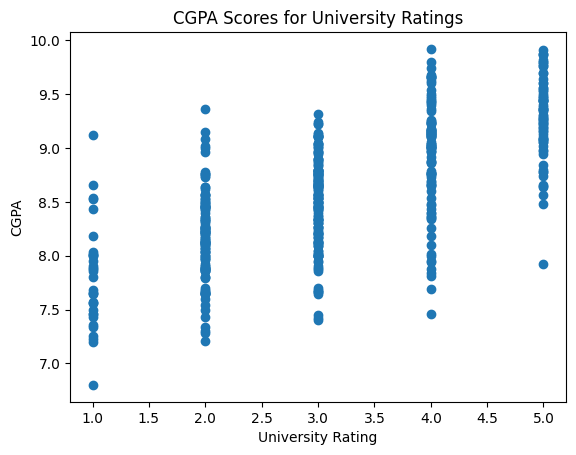

In [ ]:
#Multiple analysis and representation in graphics
plt.scatter(data_predict.UniversityRating,data_predict.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

In [ ]:
data_predict.groupby('UniversityRating')[['SOP','LOR','CGPA']].mean()

SOP       LOR      CGPA
UniversityRating                              
1                 1.941176  2.426471  7.798529
2                 2.682540  2.956349  8.177778
3                 3.308642  3.401235  8.500123
4                 4.000000  3.947619  8.936667
5                 4.479452  4.404110  9.278082

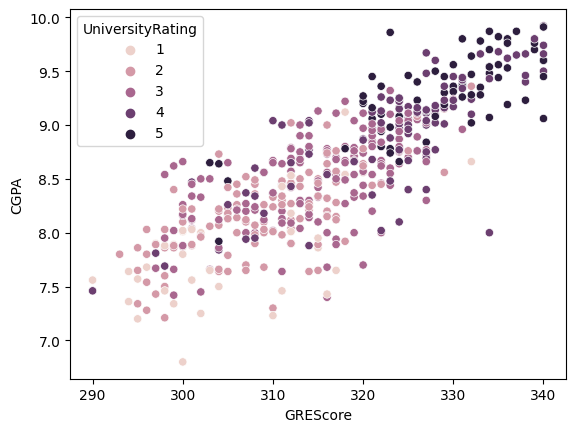

In [ ]:
sns.scatterplot(y="CGPA", x="GREScore",
                hue="UniversityRating",
                data=data_predict)
plt.show()

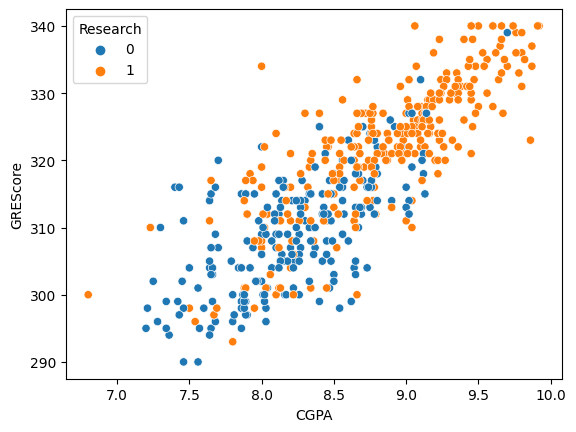

In [ ]:
sns.scatterplot(x="CGPA", y="GREScore",
                hue="Research",
                data=data_predict)
plt.show()

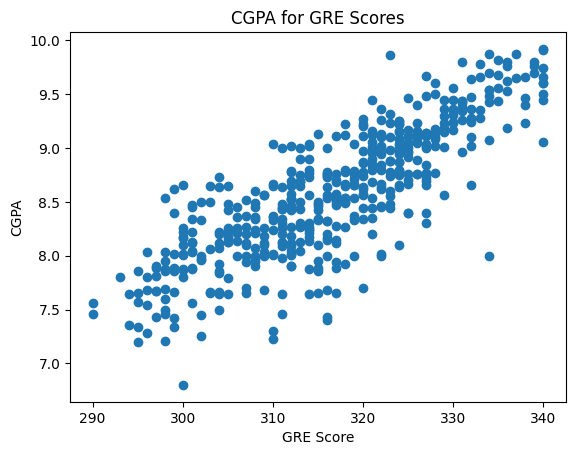

In [ ]:
plt.scatter(data_predict.GREScore,data_predict.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

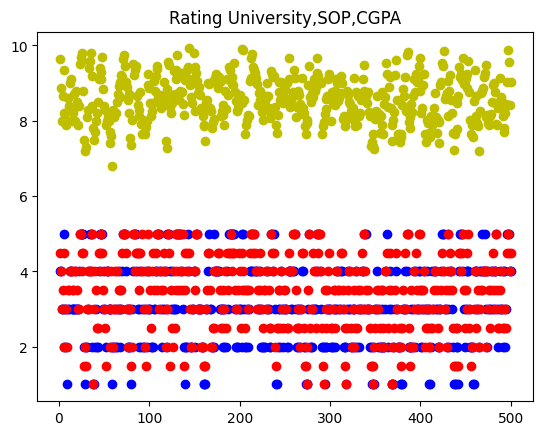

In [ ]:
plt.scatter(x=np.arange(1,501),y=data_predict['UniversityRating'],color='b')
plt.scatter(x=np.arange(1,501),y=data_predict['SOP'],color='r')
plt.scatter(x=np.arange(1,501),y=data_predict['CGPA'],color='y')
plt.title('Rating University,SOP,CGPA')
plt.show()

In [ ]:
print("Min CGPA Score :",min(data_predict.CGPA))
print("Max CGPA Score :",max(data_predict.CGPA))

Min CGPA Score : 6.8
Max CGPA Score : 9.92


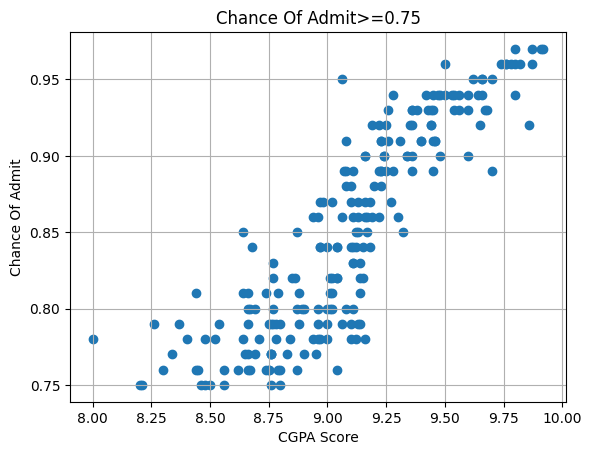

In [ ]:
plt.scatter(x=data_predict[data_predict.ChanceOfAdmit >=0.75].CGPA,y=data_predict[data_predict.ChanceOfAdmit >=0.75].ChanceOfAdmit)
plt.xlabel("CGPA Score")
plt.ylabel("Chance Of Admit")
plt.title("Chance Of Admit>=0.75")
plt.grid(True)
plt.show()

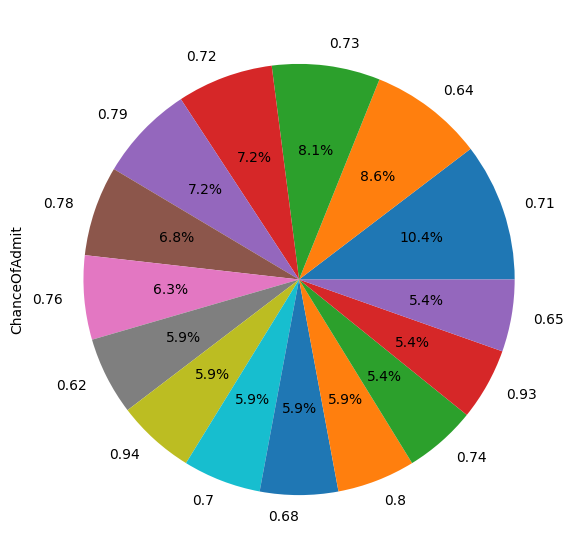

In [ ]:
plt.figure(1, figsize=(7,7))
data_predict['ChanceOfAdmit'].value_counts().head(15).plot.pie(autopct="%1.1f%%")
plt.show()


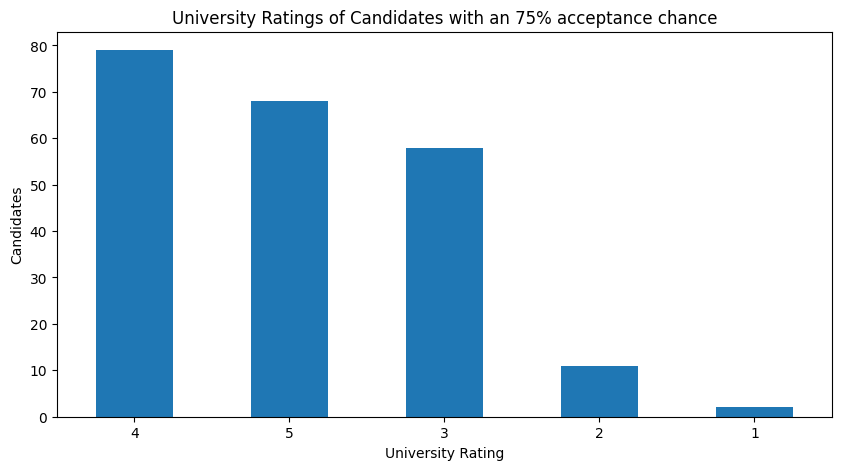

In [ ]:
s = data_predict[data_predict["ChanceOfAdmit"] >= 0.75]["UniversityRating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
color_list=['red','blue','yellow','orange','black']
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

In [ ]:
data_predict.head()

GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0       337         118                 4  4.5  4.5  9.65         1   
1       324         107                 4  4.0  4.5  8.87         1   
2       316         104                 3  3.0  3.5  8.00         1   
3       322         110                 3  3.5  2.5  8.67         1   
4       314         103                 2  2.0  3.0  8.21         0   

   ChanceOfAdmit  
0           0.92  
1           0.76  
2           0.72  
3           0.80  
4           0.65

In [ ]:
data_predict[(data_predict.TOEFLScore>100) & (data_predict['Research']==0)].head()

GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
4        314         103                 2  2.0  3.0  8.21         0   
7        308         101                 2  3.0  4.0  7.90         0   
8        302         102                 1  2.0  1.5  8.00         0   
9        323         108                 3  3.5  3.0  8.60         0   
15       314         105                 3  3.5  2.5  8.30         0   

    ChanceOfAdmit  
4            0.65  
7            0.68  
8            0.50  
9            0.45  
15           0.54

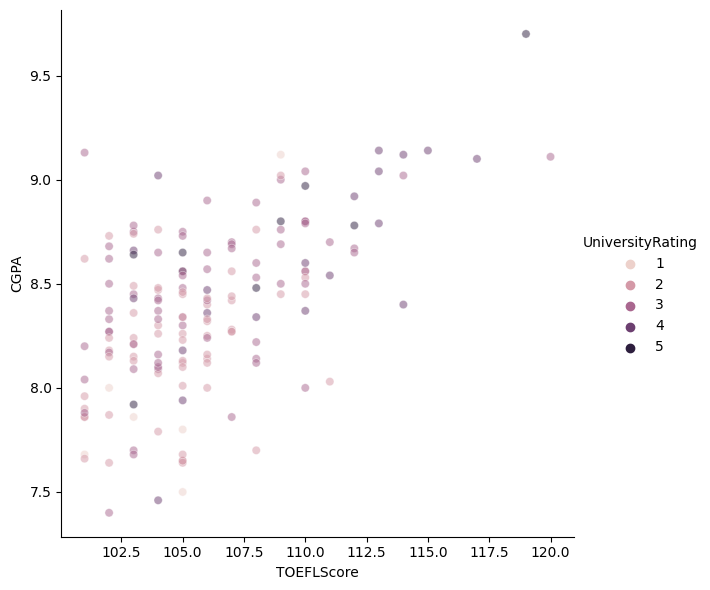

In [ ]:
sns.relplot(x="TOEFLScore", y="CGPA", hue="UniversityRating",
            sizes=(40, 400), alpha=.5,
            height=6, data=data_predict[(data_predict.TOEFLScore>100) & (data_predict['Research']==0)])
plt.show()

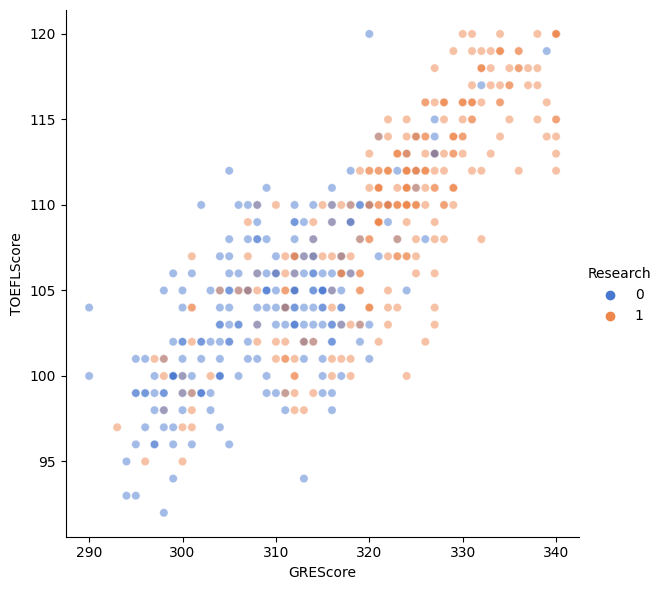

In [ ]:
sns.relplot(x="GREScore", y="TOEFLScore", hue="Research",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_predict)
plt.show()

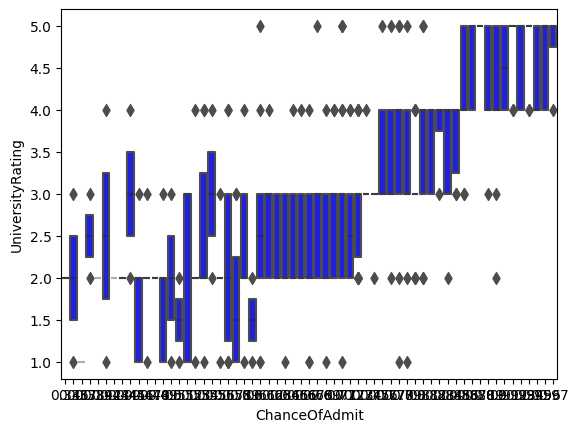

In [ ]:
sns.boxenplot(x="ChanceOfAdmit", y="UniversityRating",
              color="b",scale="linear", data=data_predict)
plt.show()

In [94]:
index_ChaceOfAdmit=[]
for sop in data_predict.SOP.value_counts().index:
    index_ChaceOfAdmit.append(len(data_predict[(data_predict['SOP']==sop)&(data_predict['ChanceOfAdmit']>0.75)]))

In [95]:
data_predict.iloc[:,:-1].corr()

GREScore  TOEFLScore  UniversityRating       SOP       LOR  \
GREScore          1.000000    0.827200          0.635376  0.613498  0.524679   
TOEFLScore        0.827200    1.000000          0.649799  0.644410  0.541563   
UniversityRating  0.635376    0.649799          1.000000  0.728024  0.608651   
SOP               0.613498    0.644410          0.728024  1.000000  0.663707   
LOR               0.524679    0.541563          0.608651  0.663707  1.000000   
CGPA              0.825878    0.810574          0.705254  0.712154  0.637469   
Research          0.563398    0.467012          0.427047  0.408116  0.372526   

                      CGPA  Research  
GREScore          0.825878  0.563398  
TOEFLScore        0.810574  0.467012  
UniversityRating  0.705254  0.427047  
SOP               0.712154  0.408116  
LOR               0.637469  0.372526  
CGPA              1.000000  0.501311  
Research          0.501311  1.000000

In [96]:
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

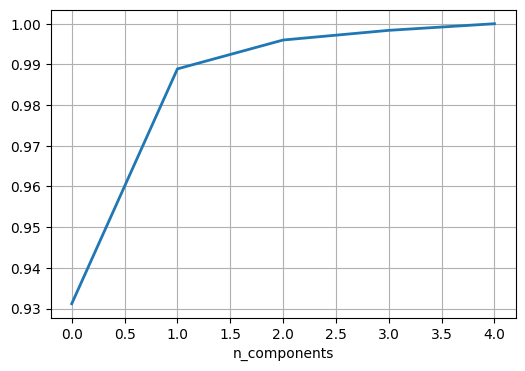

In [97]:
from sklearn.decomposition import PCA
pca=PCA()
pca.n_components=5
pca_data=pca.fit_transform(data_predict)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.show()


In [98]:
data_predict['ChanceOfAdmit']=[1 if chance>=0.75  else 0 for chance in data_predict['ChanceOfAdmit']]

In [99]:
data_predict=data_predict.astype(float)

In [100]:
dataX=data_predict.drop('ChanceOfAdmit',axis=1)
dataY=data_predict['ChanceOfAdmit']

In [101]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [102]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400, 7)
X_test (100, 7)
y_train (400,)
y_test (100,)


In [103]:
X_train = (X_train - np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test = (X_test - np.min(X_test))/(np.max(X_test)-np.min(X_test))

In [104]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [105]:
combine_features_list=[
    ('GREScore','TOEFLScore','UniversityRating'),
    ('SOP','LOR','CGPA','Research'),
    ('GREScore','SOP','TOEFLScore','CGPA'),
    ('UniversityRating','Research')
]

In [106]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)

    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]

    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test1'),
    ]

    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

('GREScore', 'TOEFLScore', 'UniversityRating')
**************************************************
Best parameters set:
{'C': 0.5, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       218
         1.0       0.87      0.80      0.84       182

    accuracy                           0.86       400
   macro avg       0.86      0.85      0.86       400
weighted avg       0.86      0.86      0.86       400

**************************************************
Train Confusion Matrix:
[[197  21]
 [ 36 146]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91        64
         1.0       0.82      0.89      0.85        36

    accuracy                     

In [108]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)

    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]

    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 27}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       218
         1.0       0.87      0.83      0.85       182

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400

**************************************************
Train Confusion Matrix:
[[195  23]
 [ 31 151]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.89        64
         1.0       0.76      0.89      0.82     

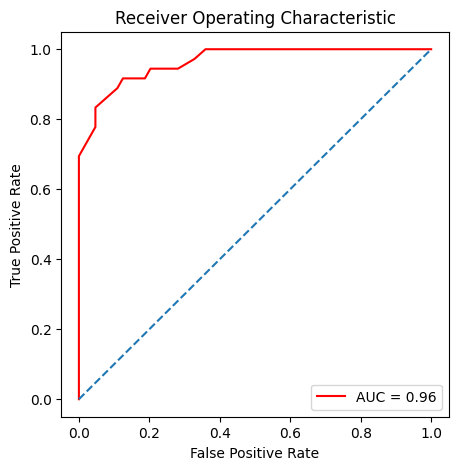

Accurancy Oranı : 0.89
KNN TRAIN score with  0.88
KNN TEST score with  0.89

[[56  8]
 [ 3 33]]


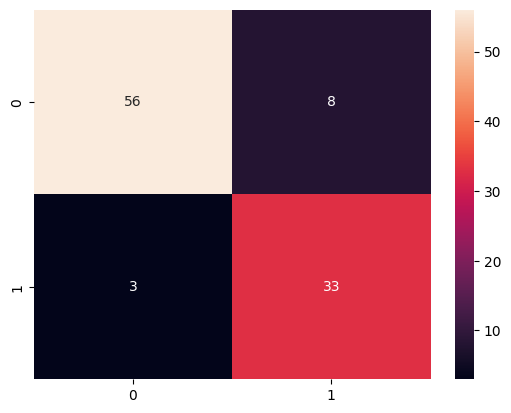

In [109]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

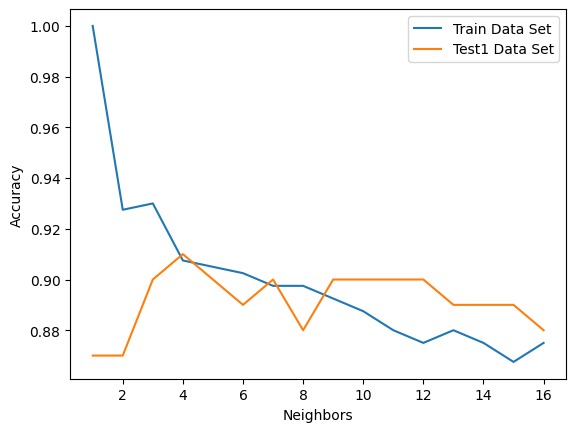

In [110]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()


In [111]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8472964943553177, 0.8427658942364823, 0.8801247771836006, 0.8825757575757577, 0.8700980392156862, 0.8775252525252525, 0.8800505050505051, 0.8674985145573381, 0.8650475341651812, 0.8700237670825904, 0.8625965537730242, 0.872549019607843, 0.8700980392156862, 0.8676470588235293, 0.8726232917409388, 0.872549019607843]


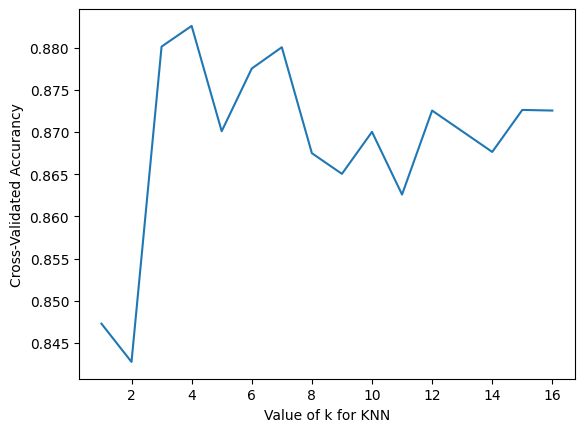

In [112]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [113]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]

    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'kernel': 'linear', 'random_state': 2}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       218
         1.0       0.88      0.82      0.85       182

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.87      0.87      0.87       400

**************************************************
Train Confusion Matrix:
[[198  20]
 [ 33 149]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        64
         1.0       0.78      0.86      0.82        36

    accuracy                         

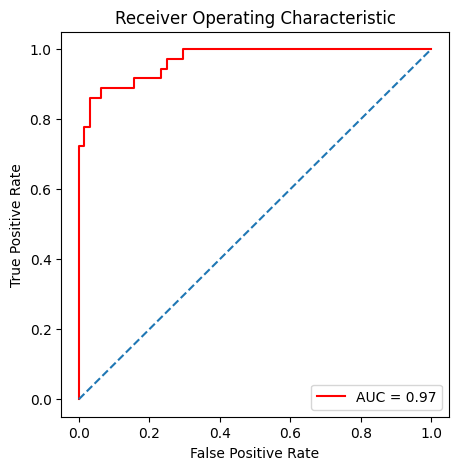

Accurancy Oranı : 0.87
SVC TRAIN score with  0.8875
SVC TEST score with  0.87

[[55  9]
 [ 4 32]]


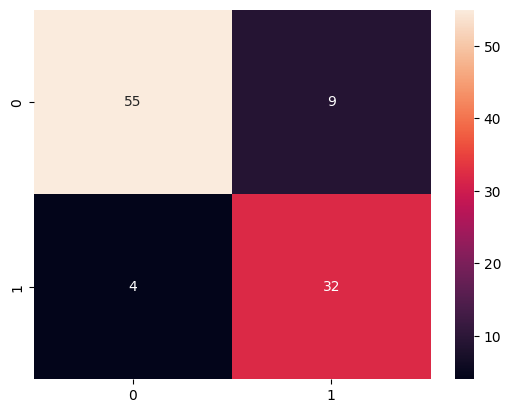

In [114]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [115]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]

    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 16, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       218
         1.0       0.91      0.81      0.86       182

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.88       400
weighted avg       0.88      0.88      0.88       400

**************************************************
Train Confusion Matrix:
[[203  15]
 [ 34 148]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        64
         1.0       0.77      0.83      0.80        36

    accuracy  

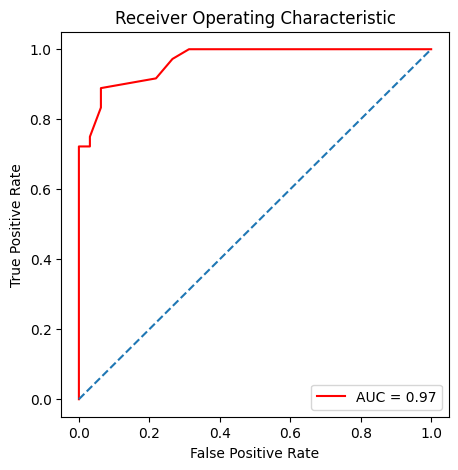

Accurancy Oranı : 0.92
GradientBoostingClassifier TRAIN score with  0.915
GradientBoostingClassifier TEST score with  0.92

[[60  4]
 [ 4 32]]


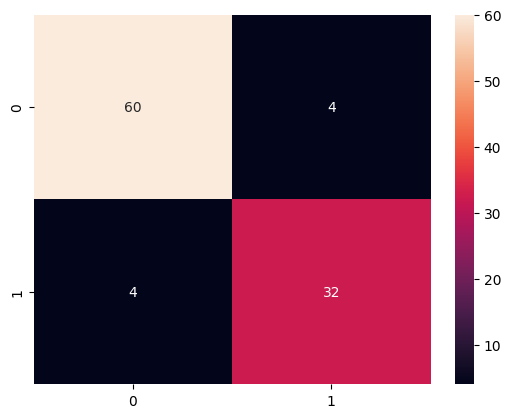

In [116]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

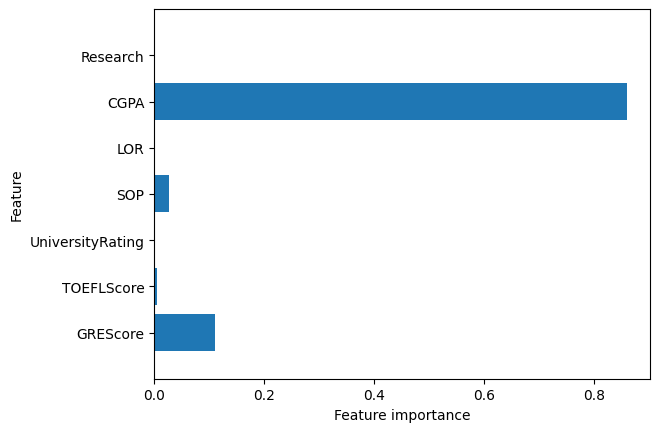

In [117]:
plot_feature_importances(gbc)
plt.show()

In [ ]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)

    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]

    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)

    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]

    for pred in predictions:

        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       218
         1.0       0.88      0.84      0.86       182

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.87       400

**************************************************
Train Confusion Matrix:
[[198  20]
 [ 30 152]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        64
         1.0       0.79      0.86      0.83        3

In [ ]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()


In [ ]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

In [ ]:
plot_feature_importances(rf)
plt.show()

In [ ]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]

    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

In [ ]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]

    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')

    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)